### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import random
import csv
from collections import defaultdict
import math
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

#import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10
    

# Data Exploration

In [3]:
input_file1 = "dataset/train.csv"
input_file2 = "dataset/validation.csv"
input_file3 = "dataset/test.csv"

## comma delimited is the default, set data type to unicode
train_df = pd.read_csv(input_file1, dtype="unicode")
val_df = pd.read_csv(input_file2, dtype="unicode")
test_df = pd.read_csv(input_file3, dtype="unicode")

train_df.head(5)


,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


In [4]:
train_df.describe()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
count,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738,...,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738
unique,2,7,24,2697738,1,2591064,39,515530,35,370,...,14,11,4,284,130,8,301,19,9,814364
top,0,0,0,14b8bbe120d6d9e0a64a77ef79672647,1,u_Z0TpZkKyPHdUQmL,windows_ie,113.106.102.*,216,219,...,90,0,0,0,44966cc8da1ed40c95d59e863c8c75f0,300,70,null,1458,null
freq,2695704,465241,202239,1,2697738,13,1619634,3731,451642,120875,...,1260243,1116187,1464916,867735,162572,1038847,155575,553300,540293,553251


In [5]:
#num of impressions in train dataset
impressionsTr = train_df['click'].count()
impressionsTr

2697738

In [6]:
#num of impressions in validation dataset
impressionsVal=val_df['click'].count()
impressionsVal

299749

In [7]:
#num of impressions in testing dataset
impressionsT=test_df['bidid'].count()
impressionsT

299749

In [8]:
count=0
total_spend=0
for index, row in train_df.iterrows():
    click = row['click']
    total_spend+=row['payprice']
    if int(click)==1:
        count+=1

print(count)

2034


In [9]:
countv = 0
for index, row in val_df.iterrows():
    click = row['click']
    if int(click)==1:
        countv+=1

print(countv)

226


In [12]:
#CTR for training dataset
CTR = (count/impressionsTr)*100
CTR

0.075396498844587587

In [13]:
#CTR for validation dataset
CTRV = (countv/impressionsVal)*100
CTRV

0.075396415000550457

In [16]:
#eCPM for training dataset
total_spend=0
for index, row in train_df.iterrows():
    total_spend+=int(row['payprice'])
eCPM = (total_spend/impressionsTr)*1000
eCPM

80251.024747399482

In [17]:
#eCPM for validation dataset
total_spendval=0
for index, row in val_df.iterrows():
    total_spendval+=int(row['payprice'])
eCPM_Val = (total_spendval/impressionsVal)*1000
eCPM_Val

80217.842261358674

In [21]:
#avgCPC
total_spend=0
for index, row in train_df.iterrows():
    total_spend+=int(row['payprice'])
avg_total_spend = total_spend/impressionsTr
avgCPC = avg_total_spend/count
avgCPC

0.039454781095083324

In [22]:
#avgCPC for validation set
total_spend_val=0
for index, row in val_df.iterrows():
    total_spend_val+=int(row['payprice'])
avg_total_spend_val = total_spend_val/impressionsVal
avgCPC_val = avg_total_spend_val/countv
avgCPC_val

0.3549462046962773

In [25]:
#total spend for train
total_spend=0
for index, row in train_df.iterrows():
    total_spend+=int(row['payprice'])
total_spend

216496239

In [26]:
#total spend for validation
total_spend_val=0
for index, row in val_df.iterrows():
    total_spend_val+=int(row['payprice'])
total_spend_val

24045218

In [27]:
#CR calculation training
conversion=0
for index, row in train_df.iterrows():
    if int(row['logtype'])==3:
        conversion+=1
CR=conversion/count
CR

0.0

In [28]:
#CR calculation validation
conversion_val=0
for index, row in val_df.iterrows():
    if int(row['logtype'])==3:
        conversion_val+=1
CR_val=conversion_val/countv
CR_val

0.0

In [29]:
#CR calculation training
total_won=0
total_lost=0
for index, row in train_df.iterrows():
    if int(row['click'])==1:
        total_won+=1
    else:
        total_lost+=1
conversion = count / (total_won + total_lost)
conversion

0.0007539649884458758

In [30]:
#CR calculation validation
total_won_val=0
total_lost_val=0
for index, row in val_df.iterrows():
    if int(row['click'])==1:
        total_won_val+=1
    else:
        total_lost_val+=1
conversion_val = countv / (total_won_val + total_lost_val)
conversion_val

0.0007539641500055046

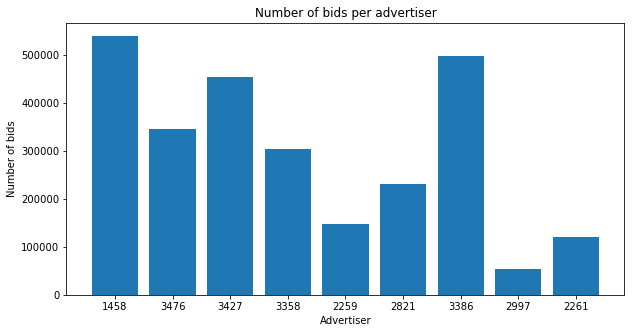

In [8]:
d = dict()
for index, row in train_df.iterrows():
    key = row['advertiser']
    if key in d:
        d[key] += 1
    else:
        d[key] = 1
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys())
ax.set_ylabel('Number of bids')
ax.set_xlabel('Advertiser')
ax.set_title('Number of bids per advertiser')
plt.show()


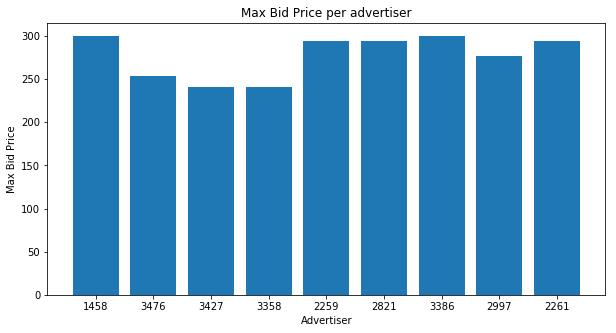

In [9]:
d = dict()
for index, row in train_df.iterrows():
    key = row['advertiser']
    maxBidPrice = int (row['bidprice'])
    if (key in d and d[key]<maxBidPrice):
        d[key] = maxBidPrice
    elif key not in d:
        d[key] = maxBidPrice
        
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys())
ax.set_ylabel('Max Bid Price')
ax.set_xlabel('Advertiser')
ax.set_title('Max Bid Price per advertiser')
plt.show()
   

In [10]:
ls = train_df.groupby('advertiser')

In [11]:
print(ls['click'].count())

advertiser
1458    540293
2259    146778
2261    120619
2821    231416
2997     54487
3358    304782
3386    498554
3427    454031
3476    346778
Name: click, dtype: int64


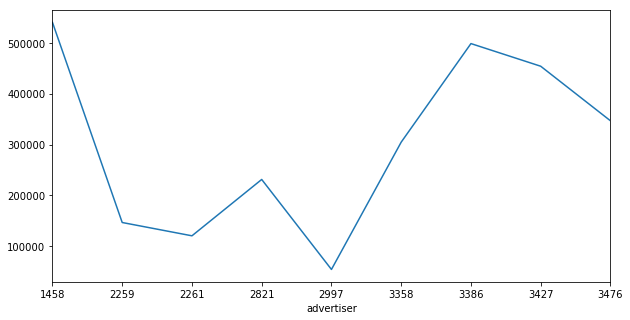

In [12]:
ls['click'].count().plot()

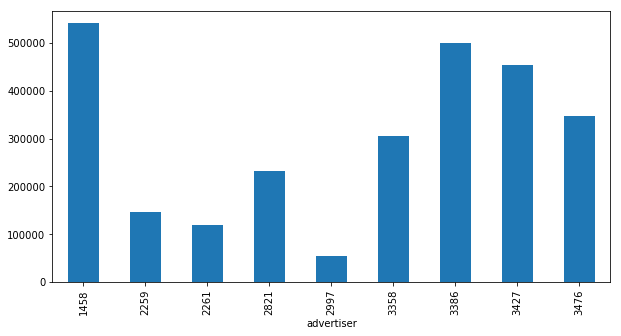

In [13]:
ls['click'].count().plot(x='advertiser',y='number of clicks',kind='bar')

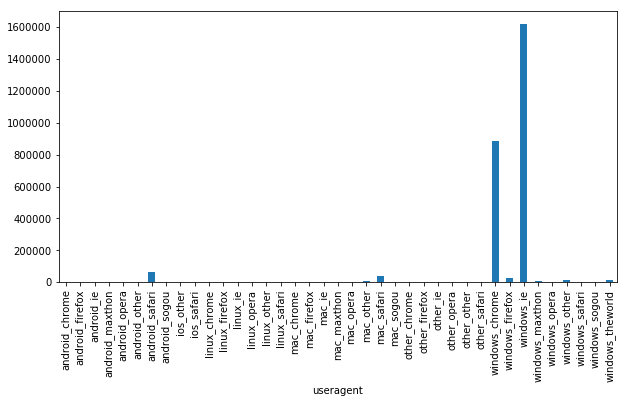

In [14]:
ls = train_df.groupby('useragent')
ls['click'].count().plot(x='useragent',y='number of clicks',kind='bar')

In [15]:
crossbar = pd.crosstab(train_df['useragent'], train_df['bidprice'])
crossbar

bidprice,227,238,241,249,254,277,294,300
useragent,,,,,,,,
android_chrome,162,6,2,0,1,119,101,119
android_firefox,7,0,0,0,0,0,3,8
android_ie,3,0,0,0,0,2,0,3
android_maxthon,8,1,0,0,1,9,6,10
android_opera,235,8,0,0,3,0,85,173
android_other,388,9,2,0,10,933,199,415
android_safari,6125,274,45,0,68,53338,2497,5381
android_sogou,1,0,0,0,0,7,6,1
ios_other,5,0,2,0,0,0,19,5


In [16]:
# Get the unique values of Bid Price
price_locs = sorted(train_df['bidprice'].unique())

price_locs_mapping = dict(zip(price_locs, 
                                 range(0, len(price_locs) + 1)))
price_locs_mapping

{'227': 0,
 '238': 1,
 '241': 2,
 '249': 3,
 '254': 4,
 '277': 5,
 '294': 6,
 '300': 7}

In [17]:
train_df['bidpricenum'] = train_df['bidprice'] \
                               .map(price_locs_mapping) \
                               .astype(int)
train_df.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,bidpricenum
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063",7
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111",3
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063,7
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111",1
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005...",1
